<a href="https://colab.research.google.com/github/Farazmghm/price-of-laptops/blob/main/laptop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This dataset contains specifications and prices of various laptops, designed for building a machine learning model to predict laptop prices. The goal is to analyze the relationships between hardware features and price, preprocess the data, and implement predictive models using machine learning techniques.

Project Overview
✔ Exploratory Data Analysis (EDA):

Examining different features, detecting outliers, understanding data distribution, and analyzing correlations between variables.

✔ Data Preprocessing:

Converting categorical variables into numerical representations.

Handling outliers and missing data (if present).

Normalizing numerical features for better model performance.

✔ Model Implementation:

Training machine learning models, specifically Random Forest and XGBoost, to predict laptop prices.

✔ Model Evaluation:

Assessing model performance using key evaluation metrics:

Root Mean Squared Error (RMSE)

Mean Absolute Error (MAE)

Coefficient of Determination (R²)

✔ Model Storage:

Saving the trained model for future predictions.

Target Variable
The target variable in this dataset is "Price ($)", representing the predicted laptop price.

High Price: Laptops with a higher price range.

Low Price: Laptops in a lower price range.

This dataset is useful for price estimation models, market analysis, and understanding the impact of hardware specifications on laptop pricing.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/drive/MyDrive/dataset2.csv')

In [5]:
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [6]:
df.shape

(11768, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [8]:

df.isna().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

,0
Brand,10
Processor,8
RAM (GB),5
Storage,5
GPU,7
Screen Size (inch),5
Resolution,4
Battery Life (hours),81
Weight (kg),231
Operating System,4


In [11]:

df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


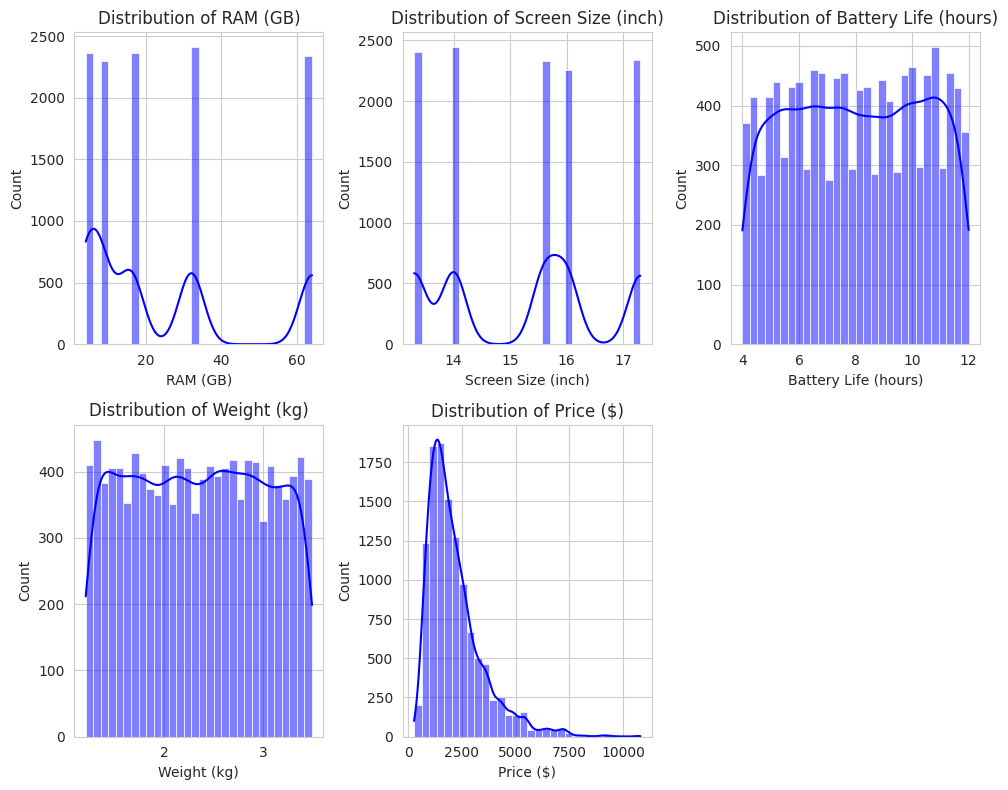

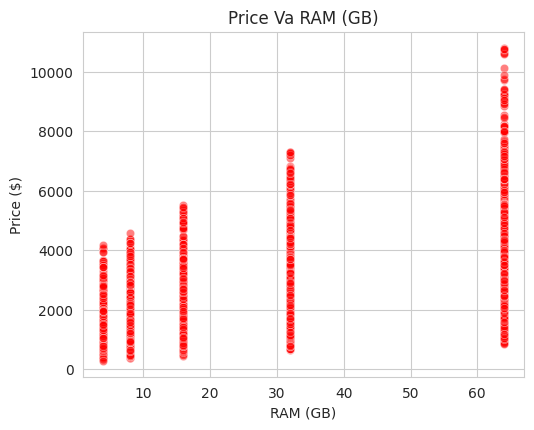

In [12]:
sns.set_style('whitegrid')
numeric=["RAM (GB)", "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)", "Price ($)"]
plt.figure(figsize=(10,8))
for i,col in enumerate(numeric,1):
  plt.subplot(2,3,i)
  sns.histplot(df[col], bins=30, kde=True, color="blue")
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

#scotter
plt.figure(figsize=(10,8))
for i, col in enumerate(numeric[:1],1):
  plt.subplot(2,2,i)
  sns.scatterplot(x=df[col], y=df["Price ($)"], alpha=0.5, color="red")
  plt.title(f"Price Va {col}")
plt.tight_layout()
plt.show()


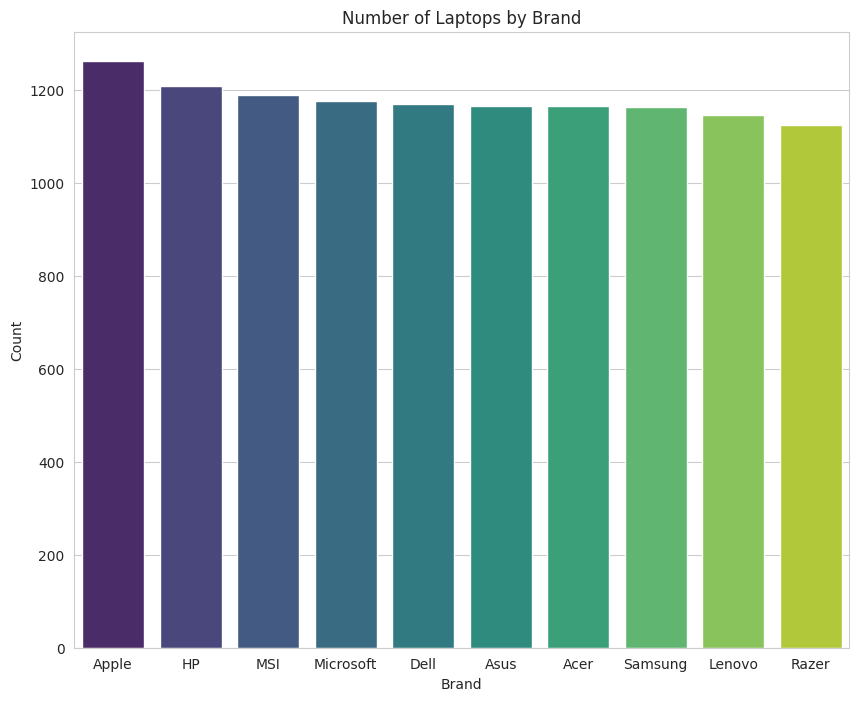

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.countplot(x=df["Brand"], order=df["Brand"].value_counts().index, palette="viridis")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Number of Laptops by Brand")
plt.show()

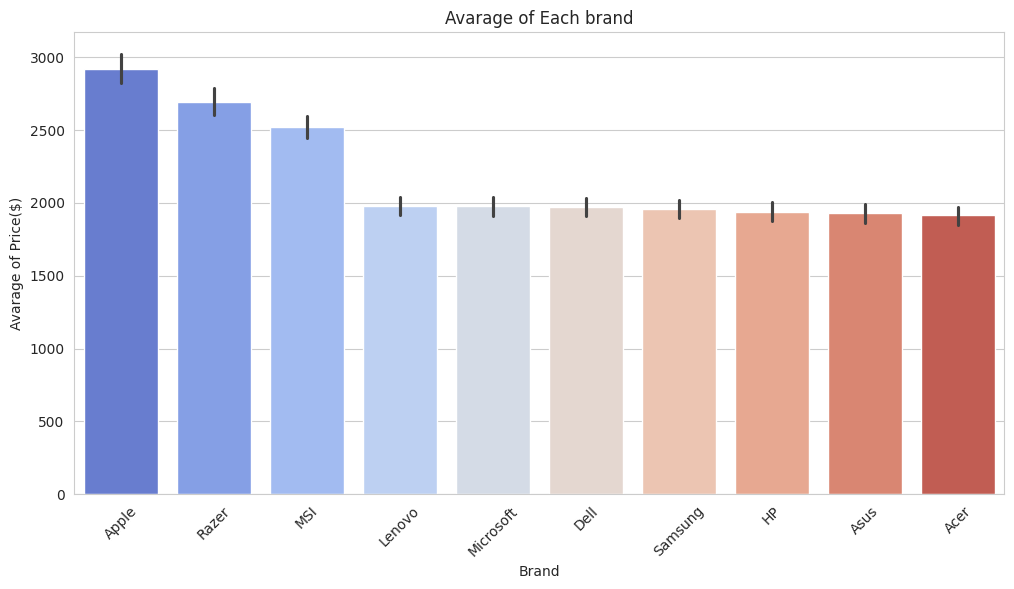

In [14]:
sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.barplot(x=df["Brand"], y=df["Price ($)"], estimator=lambda x: x.mean(), order=df.groupby("Brand")["Price ($)"].mean().sort_values(ascending=False).index, palette="coolwarm")
plt.xlabel("Brand")
plt.ylabel("Avarage of Price($)")
plt.title("Avarage of Each brand")
plt.xticks(rotation=45)
plt.show()

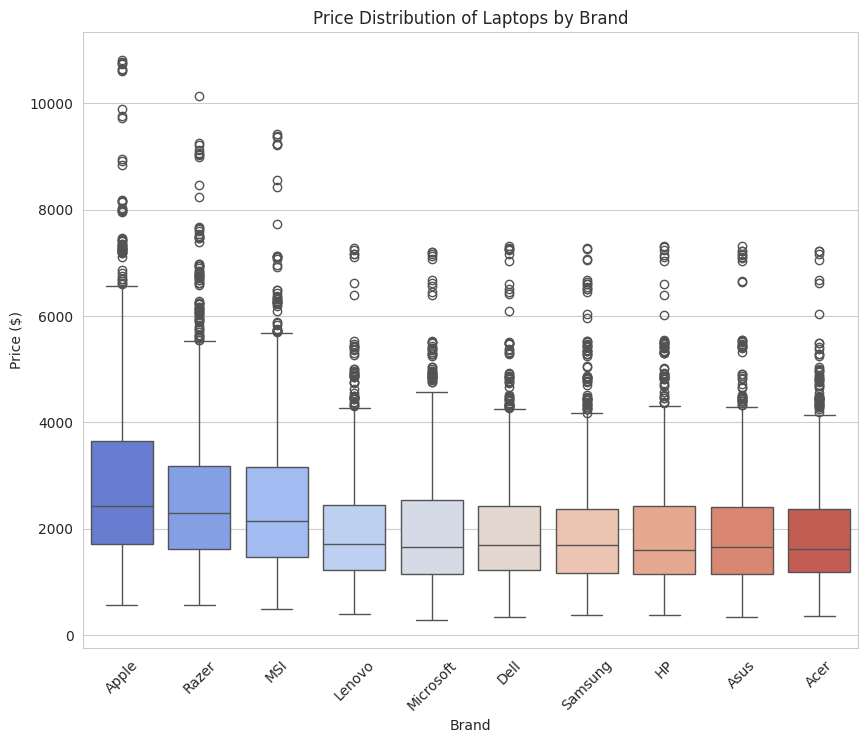

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.boxplot(x=df["Brand"],y=df['Price ($)'], order=df.groupby("Brand")["Price ($)"].mean().sort_values(ascending=False).index,palette="coolwarm")
plt.xlabel("Brand")
plt.ylabel("Price ($)")
plt.title("Price Distribution of Laptops by Brand")
plt.xticks(rotation=45)
plt.show()

RAM (GB)                0.000000
Screen Size (inch)      0.000000
Battery Life (hours)    0.000000
Weight (kg)             0.000000
Price ($)               5.141061
dtype: float64


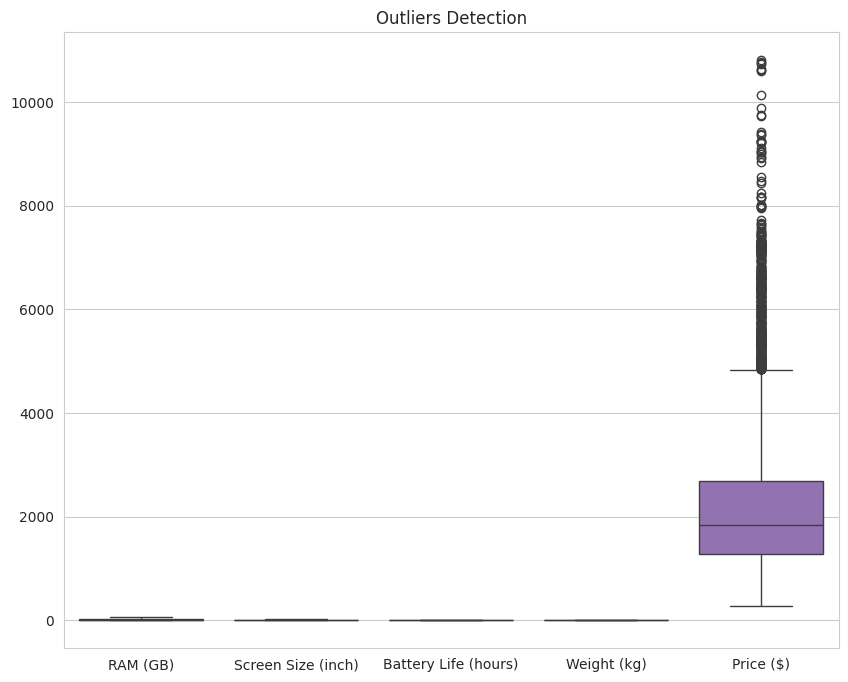

In [16]:
data=df[['RAM (GB)','Screen Size (inch)','Battery Life (hours)','Weight (kg)','Price ($)']]
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outleirs=(data<(lower_bound)) | (data>upper_bound)
outliers_percentage=(outleirs.sum()/len(data)) *100
print(outliers_percentage)
#plot
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.title("Outliers Detection")
plt.show()

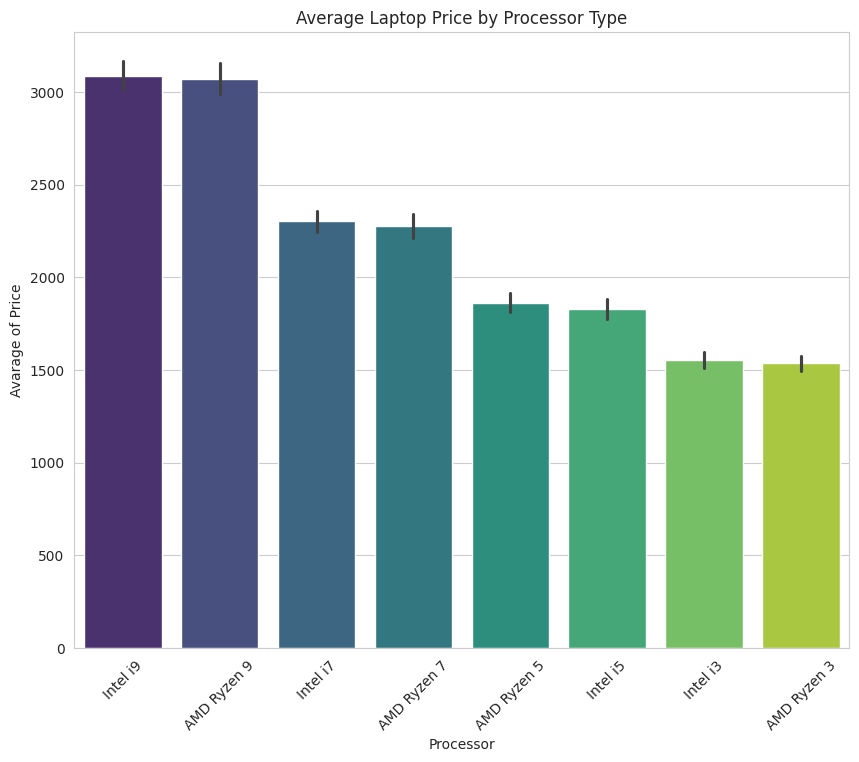

In [17]:
from itertools import groupby
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.barplot(x=df['Processor'],y=df['Price ($)'],estimator=lambda x: x.mean(),order=df.groupby('Processor')["Price ($)"].mean().sort_values(ascending=False).index,palette='viridis')
plt.xlabel("Processor")
plt.ylabel('Avarage of Price')

plt.title("Average Laptop Price by Processor Type")
plt.xticks(rotation=45)
plt.show()

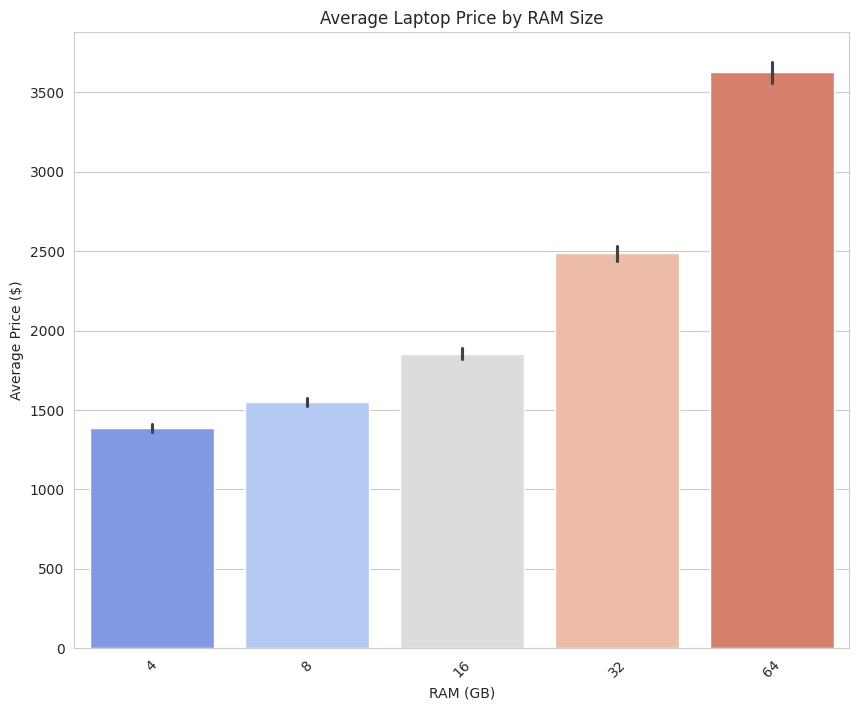

In [18]:
df['RAM (GB)']=pd.to_numeric(df['RAM (GB)'],errors='coerce')
plt.figure(figsize=(10,8))
sns.barplot(x=df['RAM (GB)'],y=df['Price ($)'],estimator=lambda x:x.mean(),order=sorted(df["RAM (GB)"].unique()),palette="coolwarm")
plt.xlabel("RAM (GB)")
plt.ylabel("Average Price ($)")
plt.title("Average Laptop Price by RAM Size")
plt.xticks(rotation=45)
plt.show()

In [19]:
import plotly.express as px

In [20]:
df['Operating System']=df['Operating System'].astype(str)
count=df['Operating System'].value_counts().reset_index()
count_col=['Operating System','Count']
fig=px.pie(count,values='count',names='Operating System',title="Distribition of operationg system",hole=0.3)
fig.show()


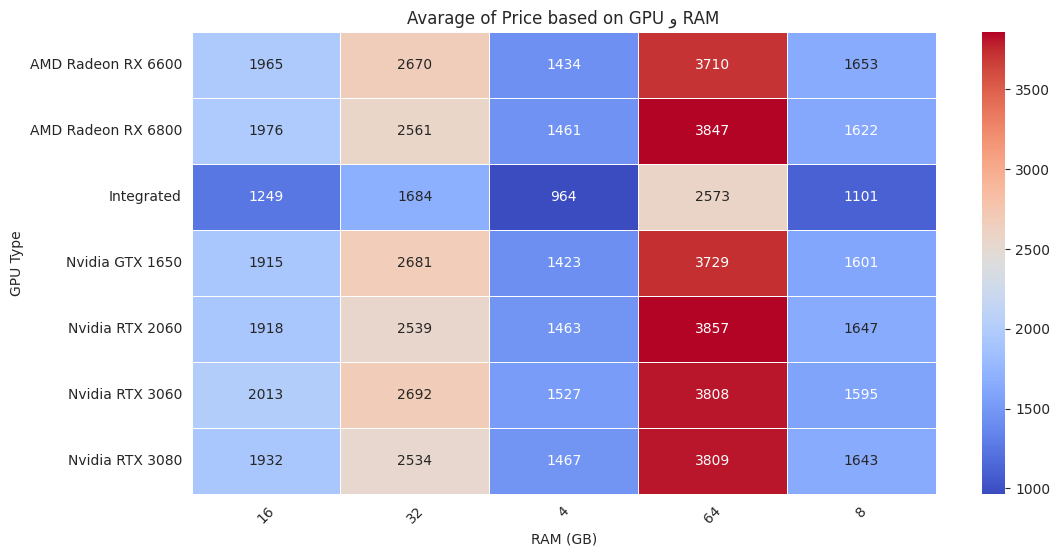

In [21]:
df["RAM (GB)"] = df["RAM (GB)"].astype(str)
heatmap_data = df.groupby(["GPU", "RAM (GB)"])["Price ($)"].mean().unstack()


plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)


plt.title("Avarage of Price based on GPU و RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("GPU Type")
plt.xticks(rotation=45)
plt.yticks(rotation=0)


plt.show()

In [22]:
df_copy=df

In [23]:
import re

In [24]:
def parse_storage(storage_str):
   match=re.match(r"(\d+)(TB|GB)\s*(SSD|HDD)",storage_str,re.IGNORECASE)
   if match:
      size,unit,storage_type=match.groups()

      size = int(size) * 1024 if unit.upper() == "TB" else int(size)
      return size, storage_type.upper()
   return None, None
df[["Storage_Capacity_GB", "Storage_Type"]] = df["Storage"].apply(lambda x: pd.Series(parse_storage(x)))
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_Capacity_GB,Storage_Type
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,512,SSD
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,1024,SSD
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,2048,SSD
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,256,SSD
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82,2048,SSD
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59,2048,SSD
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46,2048,SSD
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13,512,SSD


In [25]:
def parse_resolution(resolution_str):
  match=re.match(r"(\d+)x(\d+)",resolution_str)
  if match:
      width,height=map(int,match.groups())
      return width* height
  return None
df["Resolution_Pixels"] = df["Resolution"].apply(parse_resolution)
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_Capacity_GB,Storage_Type,Resolution_Pixels
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,512,SSD,3686400
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,1024,SSD,1049088
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,2048,SSD,8294400
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,256,SSD,1049088
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,256,SSD,8294400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82,2048,SSD,1049088
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59,2048,SSD,1049088
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46,2048,SSD,3686400
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13,512,SSD,2073600


In [26]:
def parse_processor(processor_str):
  parts=processor_str.split(" ",1)
  return parts if len(parts) == 2 else (parts[0],None)
df[["Processor_Brand", "Processor_Model"]] = df["Processor"].apply(lambda x: pd.Series(parse_processor(x)))
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_Capacity_GB,Storage_Type,Resolution_Pixels,Processor_Brand,Processor_Model
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,512,SSD,3686400,AMD,Ryzen 3
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,1024,SSD,1049088,AMD,Ryzen 7
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,2048,SSD,8294400,Intel,i5
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,256,SSD,1049088,Intel,i5
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,256,SSD,8294400,Intel,i3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82,2048,SSD,1049088,Intel,i3
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59,2048,SSD,1049088,Intel,i3
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46,2048,SSD,3686400,AMD,Ryzen 9
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13,512,SSD,2073600,AMD,Ryzen 7


In [27]:
def parse_gpu(gpu_str):
  parts=gpu_str.split(" ",1)
  return parts if len(parts) == 2 else (parts[0],None)
df[["GPU_Brand", "GPU_Model"]] = df["GPU"].apply(lambda x: pd.Series(parse_gpu(x)))
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_Capacity_GB,Storage_Type,Resolution_Pixels,Processor_Brand,Processor_Model,GPU_Brand,GPU_Model
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,512,SSD,3686400,AMD,Ryzen 3,Nvidia,GTX 1650
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,1024,SSD,1049088,AMD,Ryzen 7,Nvidia,RTX 3080
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,2048,SSD,8294400,Intel,i5,Nvidia,RTX 3060
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,256,SSD,1049088,Intel,i5,Nvidia,RTX 3080
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,256,SSD,8294400,Intel,i3,AMD,Radeon RX 6600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82,2048,SSD,1049088,Intel,i3,Nvidia,RTX 2060
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59,2048,SSD,1049088,Intel,i3,AMD,Radeon RX 6800
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46,2048,SSD,3686400,AMD,Ryzen 9,AMD,Radeon RX 6600
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13,512,SSD,2073600,AMD,Ryzen 7,Integrated,None


In [28]:
missing_values = df["Price ($)"].isnull().sum()
print(f"Missing values in Price ($): {missing_values}")

# Detect outliers using the IQR method
Q1 = df["Price ($)"].quantile(0.25)
Q3 = df["Price ($)"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df["Price ($)"] < lower_bound) | (df["Price ($)"] > upper_bound)]


print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Number of outliers: {outliers.shape[0]}")

outliers.to_csv("outliers.csv", index=False)

Missing values in Price ($): 0
Lower bound: -867.4424999999997
Upper bound: 4837.8575
Number of outliers: 605


In [29]:
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage_Capacity_GB,Storage_Type,Resolution_Pixels,Processor_Brand,Processor_Model,GPU_Brand,GPU_Model
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,512,SSD,3686400,AMD,Ryzen 3,Nvidia,GTX 1650
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,1024,SSD,1049088,AMD,Ryzen 7,Nvidia,RTX 3080
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,2048,SSD,8294400,Intel,i5,Nvidia,RTX 3060
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,256,SSD,1049088,Intel,i5,Nvidia,RTX 3080
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,256,SSD,8294400,Intel,i3,AMD,Radeon RX 6600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82,2048,SSD,1049088,Intel,i3,Nvidia,RTX 2060
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59,2048,SSD,1049088,Intel,i3,AMD,Radeon RX 6800
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46,2048,SSD,3686400,AMD,Ryzen 9,AMD,Radeon RX 6600
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13,512,SSD,2073600,AMD,Ryzen 7,Integrated,None


In [30]:
!pip install category_encoders
from category_encoders import BinaryEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [31]:
categorical_columns=['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System','Storage_Type']
# Apply One-Hot Encoding for low cardinality features
low_cardinality_features = ['Resolution', 'Operating System']
df = pd.get_dummies(df, columns=low_cardinality_features, drop_first=True)

# Apply Binary Encoding for higher cardinality features
high_cardinality_features = ['Brand', 'Processor', 'Storage', 'GPU']
binary_encoder = BinaryEncoder(cols=high_cardinality_features)
df = binary_encoder.fit_transform(df)


In [32]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["Processor_Brand", "Processor_Model", "GPU_Brand", "GPU_Model"]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))
df

,Brand_0,Brand_1,Brand_2,Brand_3,Processor_0,Processor_1,Processor_2,Processor_3,RAM (GB),Storage_0,...,Processor_Brand,Processor_Model,GPU_Brand,GPU_Model,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,0,0,0,1,0,0,0,1,64,0,...,0,0,2,0,False,True,False,False,False,False
1,0,0,1,0,0,0,1,0,4,0,...,0,2,2,4,False,False,False,True,False,False
2,0,0,1,1,0,0,1,1,32,0,...,1,5,2,3,False,False,True,False,False,False
3,0,1,0,0,0,0,1,1,4,1,...,1,5,2,4,False,False,False,False,True,False
4,0,0,1,0,0,1,0,0,4,1,...,1,4,0,5,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,0,1,0,1,0,1,0,0,4,0,...,1,4,2,2,False,False,False,False,False,True
11764,0,0,1,1,0,1,0,0,4,0,...,1,4,0,6,False,False,False,True,False,False
11765,0,0,1,0,0,1,0,1,4,0,...,0,3,0,5,False,True,False,True,False,False
11766,1,0,0,1,0,0,1,0,16,0,...,0,2,1,1,True,False,False,False,False,True


In [33]:
bool_cols = ["Resolution_1920x1080", "Resolution_2560x1440", "Resolution_3840x2160",
             "Operating System_Linux", "Operating System_Windows", "Operating System_macOS"]

df[bool_cols] = df[bool_cols].astype(int)
df

,Brand_0,Brand_1,Brand_2,Brand_3,Processor_0,Processor_1,Processor_2,Processor_3,RAM (GB),Storage_0,...,Processor_Brand,Processor_Model,GPU_Brand,GPU_Model,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,0,0,0,1,0,0,0,1,64,0,...,0,0,2,0,0,1,0,0,0,0
1,0,0,1,0,0,0,1,0,4,0,...,0,2,2,4,0,0,0,1,0,0
2,0,0,1,1,0,0,1,1,32,0,...,1,5,2,3,0,0,1,0,0,0
3,0,1,0,0,0,0,1,1,4,1,...,1,5,2,4,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,4,1,...,1,4,0,5,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,0,1,0,1,0,1,0,0,4,0,...,1,4,2,2,0,0,0,0,0,1
11764,0,0,1,1,0,1,0,0,4,0,...,1,4,0,6,0,0,0,1,0,0
11765,0,0,1,0,0,1,0,1,4,0,...,0,3,0,5,0,1,0,1,0,0
11766,1,0,0,1,0,0,1,0,16,0,...,0,2,1,1,1,0,0,0,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand_0                   11768 non-null  int64  
 1   Brand_1                   11768 non-null  int64  
 2   Brand_2                   11768 non-null  int64  
 3   Brand_3                   11768 non-null  int64  
 4   Processor_0               11768 non-null  int64  
 5   Processor_1               11768 non-null  int64  
 6   Processor_2               11768 non-null  int64  
 7   Processor_3               11768 non-null  int64  
 8   RAM (GB)                  11768 non-null  object 
 9   Storage_0                 11768 non-null  int64  
 10  Storage_1                 11768 non-null  int64  
 11  Storage_2                 11768 non-null  int64  
 12  GPU_0                     11768 non-null  int64  
 13  GPU_1                     11768 non-null  int64  
 14  GPU_2 

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Storage_Type"] = le.fit_transform(df["Storage_Type"])
df['Storage_Type']

,Storage_Type
0,1
1,1
2,1
3,1
4,1
...,...
11763,1
11764,1
11765,1
11766,1


In [36]:
df["RAM (GB)"] = pd.to_numeric(df["RAM (GB)"], errors="coerce")

df["RAM (GB)"] = df["RAM (GB)"].astype(str)

df["RAM (GB)"] = df["RAM (GB)"].str.replace(r"\D", "", regex=True)

df["RAM (GB)"] = pd.to_numeric(df["RAM (GB)"], errors="coerce")


df["RAM (GB)"].fillna(df["RAM (GB)"].median(), inplace=True)


df["RAM (GB)"].head()

df["RAM (GB)"]

,RAM (GB)
0,64
1,4
2,32
3,4
4,4
...,...
11763,4
11764,4
11765,4
11766,16


In [37]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,learning_curve

In [39]:
y= df["Price ($)"]
X = df.drop(columns=["Price ($)"])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot learning curve
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5))
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
    plt.plot(train_sizes, test_scores_mean, label='Validation Error', marker='s')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend()
    plt.grid()
    plt.show()
def evaluate_model(pipeline, X, y, dataset_name):
       predictions = pipeline.predict(X)
       mse = mean_squared_error(y, predictions)
       rmse = np.sqrt(mse)
       mae = mean_absolute_error(y, predictions)
       r2 = r2_score(y, predictions)

       print(f"Model Evaluation On {dataset_name} Set:")
       print(f"Mean Squared Error (MSE): {mse:.4f}")
       print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
       print(f"Mean Absolute Error (MAE): {mae:.4f}")
       print(f"R-squared (R²): {r2:.4f}")
       return mse, rmse, mae, r2

Model Evaluation On Train (Random Forest) Set:
Mean Squared Error (MSE): 100864.3240
Root Mean Squared Error (RMSE): 317.5914
Mean Absolute Error (MAE): 234.5527
R-squared (R²): 0.9415
Model Evaluation On Test (Random Forest) Set:
Mean Squared Error (MSE): 209030.2855
Root Mean Squared Error (RMSE): 457.1983
Mean Absolute Error (MAE): 321.7495
R-squared (R²): 0.8820
Model Evaluation On Train (XGBoost) Set:
Mean Squared Error (MSE): 858.5815
Root Mean Squared Error (RMSE): 29.3016
Mean Absolute Error (MAE): 20.9123
R-squared (R²): 0.9995
Model Evaluation On Test (XGBoost) Set:
Mean Squared Error (MSE): 77798.5226
Root Mean Squared Error (RMSE): 278.9239
Mean Absolute Error (MAE): 165.8564
R-squared (R²): 0.9561


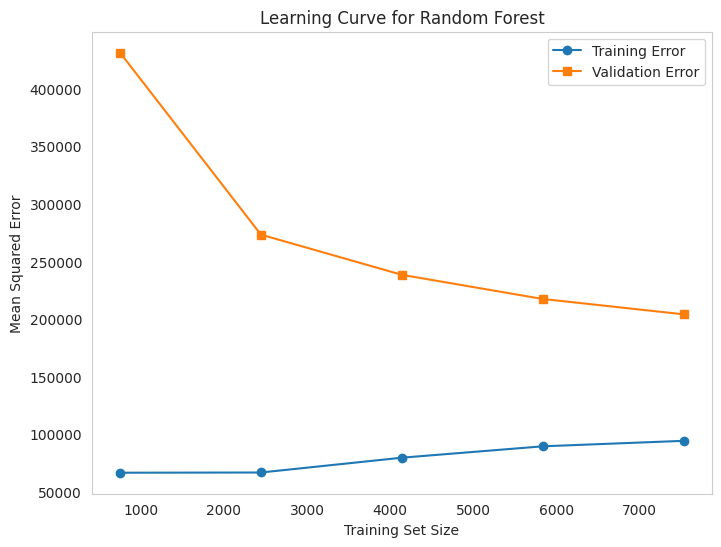

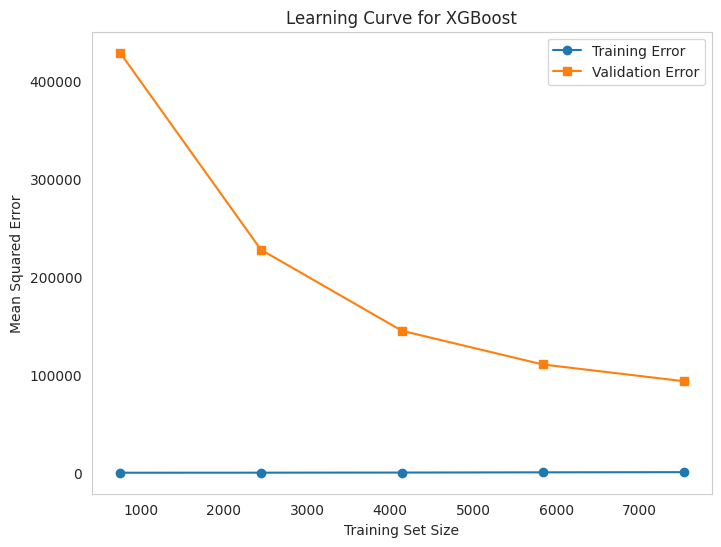

In [40]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42))
])

# Train models
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

# Evaluate models
evaluate_model(rf_pipeline, X_train, y_train, "Train (Random Forest)")
evaluate_model(rf_pipeline, X_test, y_test, "Test (Random Forest)")
evaluate_model(xgb_pipeline, X_train, y_train, "Train (XGBoost)")
evaluate_model(xgb_pipeline, X_test, y_test, "Test (XGBoost)")

# Plot learning curves
plot_learning_curve(RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42), X_train, y_train, "Random Forest")
plot_learning_curve(XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42), X_train, y_train, "XGBoost")

In [ ]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor()


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)

print("best_param:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
